In [1]:
import numpy as np
np.random.seed(42)

In [2]:
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/auto.csv')

In [3]:
df = pd.get_dummies(df, columns=['origin'])
df

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg,origin_1,origin_2,origin_3
0,8,307.0,130.0,3504.0,12.0,70,18.0,1,0,0
1,8,350.0,165.0,3693.0,11.5,70,15.0,1,0,0
2,8,318.0,150.0,3436.0,11.0,70,18.0,1,0,0
3,8,304.0,150.0,3433.0,12.0,70,16.0,1,0,0
4,8,302.0,140.0,3449.0,10.5,70,17.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
387,4,140.0,86.0,2790.0,15.6,82,27.0,1,0,0
388,4,97.0,52.0,2130.0,24.6,82,44.0,0,1,0
389,4,135.0,84.0,2295.0,11.6,82,32.0,1,0,0
390,4,120.0,79.0,2625.0,18.6,82,28.0,1,0,0


In [4]:
# 데이터 X,y 분리하기
y=df['mpg']
X=df.drop(columns='mpg')

In [5]:
# 학습 준비
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
kfold = KFold(n_splits=5, shuffle=True)
reg = RandomForestRegressor()
param_grid = {'max_depth':[2,3,4,5,6,7,8,9,10]}
grid_search = GridSearchCV(estimator=reg, cv=kfold, param_grid=param_grid, scoring='neg_mean_squared_error', return_train_score=True)
result = grid_search.fit(X,y)

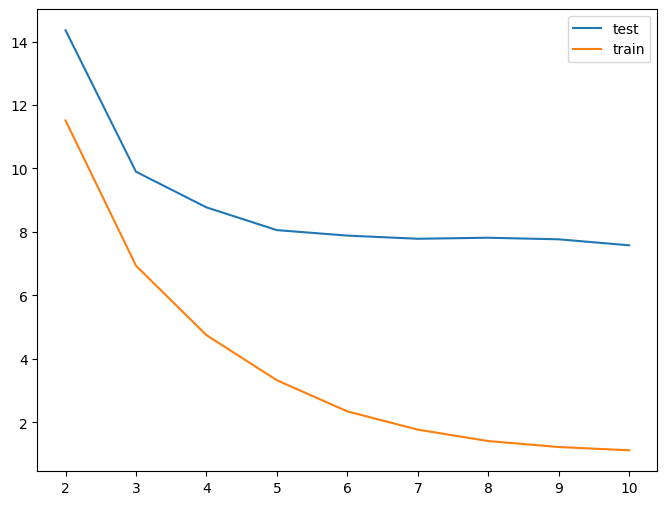

In [6]:
# 하이퍼패러미터 변화에 따른 성능 시각화
import matplotlib.pyplot as plt
result_df = pd.DataFrame(result.cv_results_)
plt.figure(figsize=(8,6,))
plt.plot(result_df['param_max_depth'], -result_df['mean_test_score'], label='test')
plt.plot(result_df['param_max_depth'], -result_df['mean_train_score'], label='train')
plt.legend()

In [7]:
## 성능 확인
result.best_score_, result.best_params_

(-7.579188775400818, {'max_depth': 10})

In [8]:
kfold = KFold(n_splits=5, shuffle=True)
reg = RandomForestRegressor()
param_grid = {'max_depth':[2,5,10,30,50],
              'n_estimators': [50,100,200,500], # 생성할 tree의 개수 
              'max_features': ['sqrt','log2'] #  각 결정 트리를 생성할 때 사용할 특성의 최대 개수를 지정하는데, 
                                              #  이는 트리의 다양성을 조절하고 모델의 안정성을 향상시키는 역할
             }
grid_search = GridSearchCV(estimator=reg, cv=kfold, param_grid=param_grid, scoring='neg_mean_squared_error', return_train_score=True)
result = grid_search.fit(X,y)

In [9]:
result.best_score_, result.best_params_

(-7.115564563972734,
 {'max_depth': 30, 'max_features': 'log2', 'n_estimators': 100})

In [10]:
## 데이터 불러오기
import pandas as pd
df=pd.read_csv('https://raw.githubusercontent.com/ralbu85/DataScience_2022S/master/data/heart.csv')
df=df.dropna()

In [11]:
## 원핫인코딩
df = pd.get_dummies(df, columns=['Sex','AHD','ChestPain','Thal','AHD'])
df

,Age,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,...,AHD_Yes,ChestPain_asymptomatic,ChestPain_nonanginal,ChestPain_nontypical,ChestPain_typical,Thal_fixed,Thal_normal,Thal_reversable,AHD_No,AHD_Yes
0,63,145,233,1,2,150,0,2.3,3,0.0,...,0,0,0,0,1,1,0,0,1,0
1,67,160,286,0,2,108,1,1.5,2,3.0,...,1,1,0,0,0,0,1,0,0,1
2,67,120,229,0,2,129,1,2.6,2,2.0,...,1,1,0,0,0,0,0,1,0,1
3,37,130,250,0,0,187,0,3.5,3,0.0,...,0,0,1,0,0,0,1,0,1,0
4,41,130,204,0,2,172,0,1.4,1,0.0,...,0,0,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57,140,241,0,0,123,1,0.2,2,0.0,...,1,1,0,0,0,0,0,1,0,1
298,45,110,264,0,0,132,0,1.2,2,0.0,...,1,0,0,0,1,0,0,1,0,1
299,68,144,193,1,0,141,0,3.4,2,2.0,...,1,1,0,0,0,0,0,1,0,1
300,57,130,131,0,0,115,1,1.2,2,1.0,...,1,1,0,0,0,0,0,1,0,1


In [12]:
## X와 y 구분
y = df['AHD_Yes']
X = df.drop(columns=['AHD_Yes','AHD_No'])

In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV

## 학습준비
kfold = KFold(n_splits=5, shuffle=True)
clf = RandomForestClassifier()
param_grid = {'max_depth':[2,5,10,30,50],
              'n_estimators': [50,100,200,500],
              'max_features': ['sqrt','log2']              
             }
grid_search = GridSearchCV(estimator=clf, cv=kfold, param_grid=param_grid, scoring='accuracy', return_train_score=True)
result = grid_search.fit(X,y)

In [14]:
## 성능 확인
result.best_score_, result.best_params_

(0.8380790960451977,
 {'max_depth': 2, 'max_features': 'sqrt', 'n_estimators': 100})